# To run lasso regression on the same data to see how well our model performs

## load data

In [1]:
import sys
sys.path.append('/cellar/users/hsher/ontoencoder')
from ontoencoder.util import *
adata = tasic_data()

/cellar/users/hsher/miniconda3/envs/ontoencoder/lib/python3.6/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
X = adata.X

In [3]:
y = pd.get_dummies(adata.obs['class']).values

In [4]:
d = DataLoader(X, y)
X_train, y_train, X_test, y_test = d.split()

In [5]:
def to_class(y):
    return(np.argmax(y, axis = 1))

In [6]:
to_class(y_train)

array([0, 1, 1, ..., 1, 0, 1])

# Regression

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, to_class(y_train))
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

clf.score(X_test, to_class(y_test)) # accuracy

/cellar/users/hsher/miniconda3/envs/ontoencoder/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9402173913043478

In [8]:
from ontoencoder.val import *


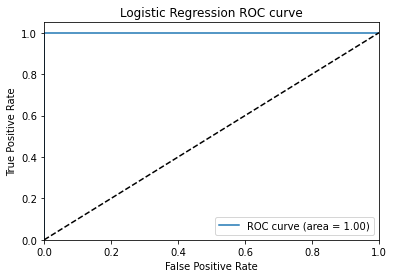

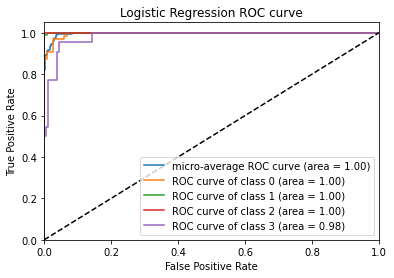

In [9]:
multiple_class_roc(y_test, y_score) # it is a very easy task

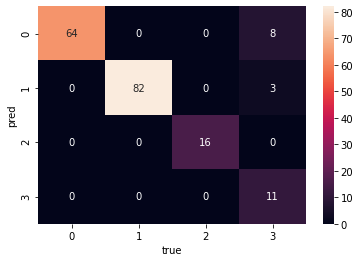

In [10]:


multiple_class_confusion_matrix(y_test, y_score)

### Logistic regression interpretability


In [11]:
clf.get_params() # ridge regression

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
def predictive_genes(clf, n_genes = 100, gene_name = adata.var.index):
    ''' return genes/terms positively associated with predicting a cell type'''
    
    
    gene_indice = np.where(np.argsort(-clf.coef_, axis = 1)<n_genes)[1]
    class_indice = np.where(np.argsort(-clf.coef_, axis = 1)<n_genes)[0]
    gene_indice_by_class = np.split(gene_indice, np.unique(class_indice, return_index = True)[1])[1:]
    
    genes = [gene_name[index] for index in gene_indice_by_class]
    df = pd.DataFrame()
    for i in range(len(genes)):
        df = df.append([[g,i] for g in genes[i]], ignore_index = True)
    df.columns = ['gene', 'cell_type']
    return df

In [13]:
df = predictive_genes(clf)
df.to_csv('logreg_genes.csv') # move to R for GO enrichment analysis

# Lasso regression

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, penalty = 'l1', solver = 'liblinear').fit(X_train, to_class(y_train)) # lasso
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

clf.score(X_test, to_class(y_test)) # accuracy

0.9510869565217391

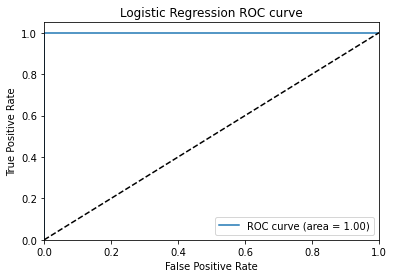

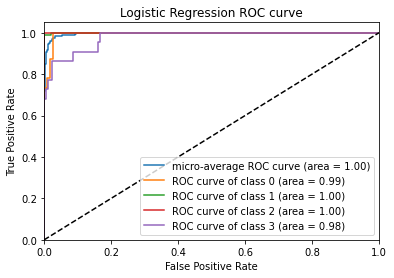

In [15]:
multiple_class_roc(y_test, y_score) # it is a very easy task

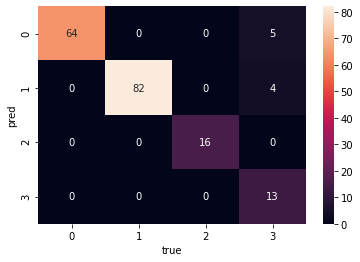

In [16]:
multiple_class_confusion_matrix(y_test, y_score)

In [17]:
df = predictive_genes(clf)
df.to_csv('logreglasso_genes.csv')

# On aggregated Ontology

In [18]:
aggr_RNAseq = pd.read_pickle('tasic_aggr.pickle')

In [19]:
aggr_RNAseq.head()

,GO:0005575,GO:0008150,GO:0003674,GO:0003887,GO:0050080,GO:0005018,GO:0043168,GO:0005795,GO:0043169,GO:0036137,...,GO:0004797,GO:0042495,GO:0071812,GO:0071848,GO:1990584,GO:0002940,GO:0061953,GO:0003980,GO:0097359,GO:0060031
index,,,,,,,,,,,,,,,,,,,,,
Calb2_tdTpositive_cell_1,3011.144043,2939.060059,2920.425537,2.731863,0.001477,0.000000,597.781250,26.350430,667.751343,1.658312,...,0.00000,0.0,0.026722,0.026722,0.0,0.000742,0.000000,1.723683,1.723683,0.756564
Calb2_tdTpositive_cell_2,2779.427490,2694.361328,2707.609375,1.538884,0.000000,0.000000,554.181763,23.858187,625.596680,2.067528,...,0.00000,0.0,0.009406,0.009406,0.0,0.026661,0.460045,0.095000,0.095000,0.000000
Calb2_tdTpositive_cell_3,3049.372803,2955.737305,2969.220215,2.245917,0.000000,0.000000,587.980347,32.352573,708.125061,0.000000,...,0.00000,0.0,0.045489,0.045489,0.0,0.013275,0.002769,0.006826,0.006826,0.000000
Calb2_tdTpositive_cell_4,3151.281250,3067.060303,3072.520508,3.267318,0.000000,0.189799,620.067871,29.078972,733.072754,2.077794,...,0.00000,0.0,0.053662,0.053662,0.0,0.000000,0.000000,0.002497,0.002497,0.000000
Calb2_tdTpositive_cell_5,2978.770996,2894.547363,2911.715332,3.133240,0.000775,0.000000,589.903076,31.151470,673.887451,0.004644,...,0.07938,0.0,0.025701,0.025701,0.0,0.000000,0.000357,0.325173,0.325173,0.000000


In [20]:
X = aggr_RNAseq.values
y = pd.get_dummies(adata.obs['class']).values
d = DataLoader(X, y)
X_train, y_train, X_test, y_test = d.split()

In [21]:
clf = LogisticRegression(random_state=0, penalty = 'l1', solver = 'liblinear').fit(X_train, to_class(y_train)) # lasso
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

clf.score(X_test, to_class(y_test)) # accuracy

0.9347826086956522

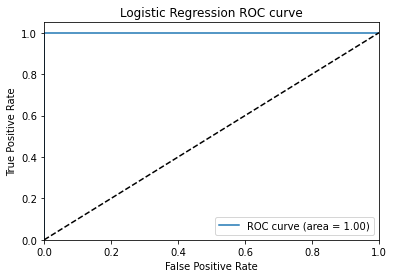

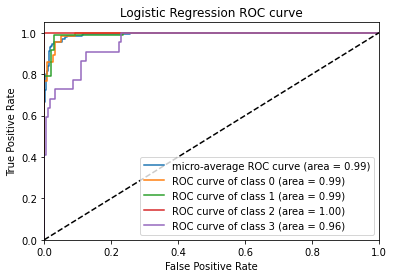

In [22]:
multiple_class_roc(y_test, y_score) # it is a very easy task

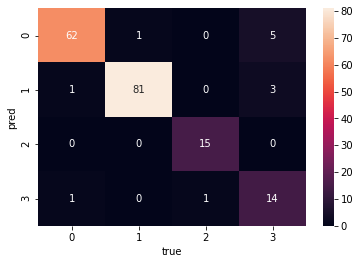

In [23]:
multiple_class_confusion_matrix(y_test, y_score)

In [24]:
data_root = '/cellar/users/hsher/ontoPrune/data/'
term_entropy = pd.read_pickle(data_root + 'term_entropy.pickle')

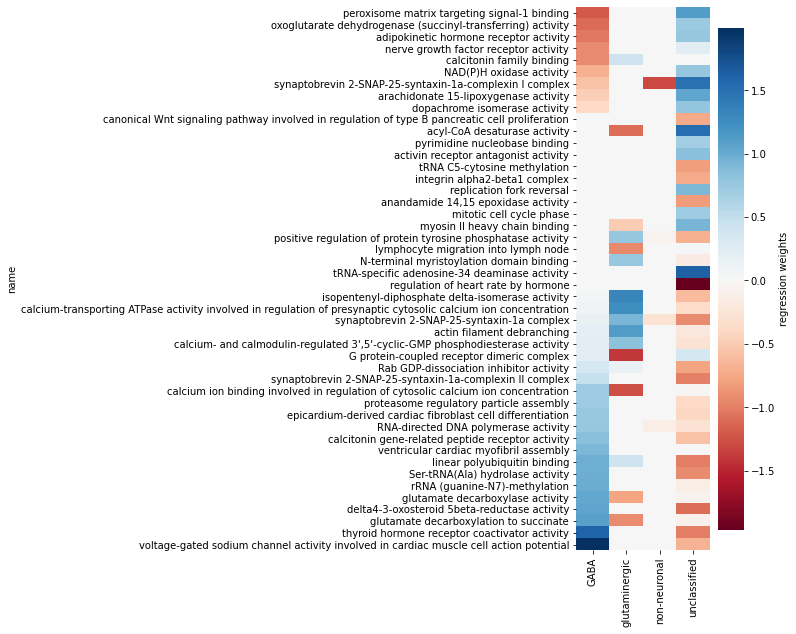

In [25]:
coef = pd.DataFrame(clf.coef_, columns = term_entropy.loc[aggr_RNAseq.columns, 'name'], index = adata.obs['class'].unique())

retained_col = []
for c in coef.columns:
    if (coef[c].abs()> 0.7).any():
        retained_col.append(c)
ig, ax = plt.subplots(figsize=(3,10))   
sns.heatmap(coef[retained_col].transpose().sort_values(by = 'GABA'), cmap = 'RdBu', ax = ax, yticklabels=True, cbar_kws={'label': 'regression weights'})


# only on the Cellular Component branches

In [26]:
aggr_RNAseq = pd.read_pickle('tasic_aggr_CC.pickle')
X = aggr_RNAseq.values
y = pd.get_dummies(adata.obs['class']).values
d = DataLoader(X, y)
X_train, y_train, X_test, y_test = d.split()
clf = LogisticRegression(random_state=0, penalty = 'l1', solver = 'liblinear').fit(X_train, to_class(y_train)) # lasso
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

clf.score(X_test, to_class(y_test)) # accuracy

0.9510869565217391

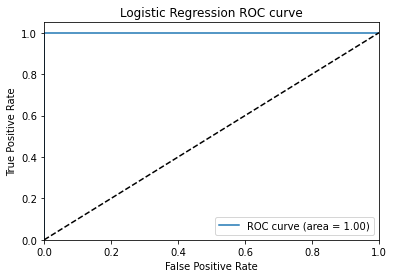

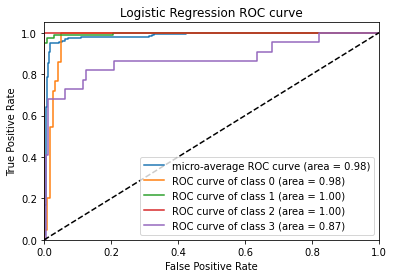

In [27]:
multiple_class_roc(y_test, y_score) # it is a very easy task

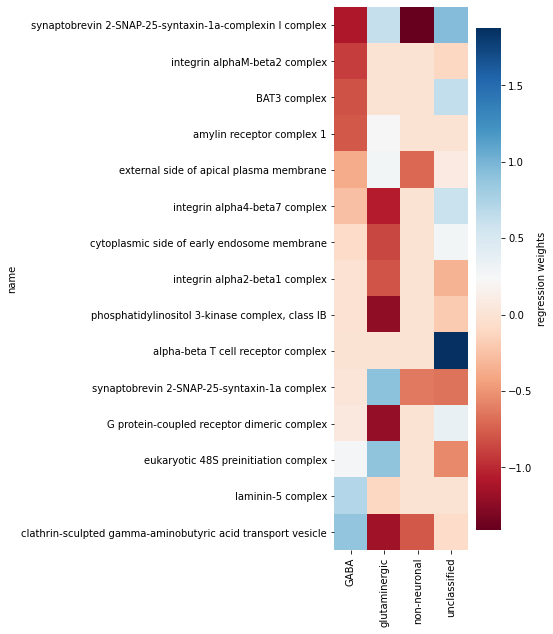

In [28]:
coef = pd.DataFrame(clf.coef_, columns = term_entropy.loc[aggr_RNAseq.columns, 'name'], index = adata.obs['class'].unique())

retained_col = []
for c in coef.columns:
    if (coef[c].abs()> 0.7).any():
        retained_col.append(c)
ig, ax = plt.subplots(figsize=(3,10))   
sns.heatmap(coef[retained_col].transpose().sort_values(by = 'GABA'), cmap = 'RdBu', ax = ax, yticklabels=True, cbar_kws={'label': 'regression weights'})


# Only focusing on BP branch

In [29]:
aggr_RNAseq = pd.read_pickle('tasic_aggr_BP.pickle')
X = aggr_RNAseq.values
y = pd.get_dummies(adata.obs['class']).values
d = DataLoader(X, y)
X_train, y_train, X_test, y_test = d.split()
clf = LogisticRegression(random_state=0, penalty = 'l1', solver = 'liblinear').fit(X_train, to_class(y_train)) # lasso
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

clf.score(X_test, to_class(y_test)) # accuracy

0.9021739130434783

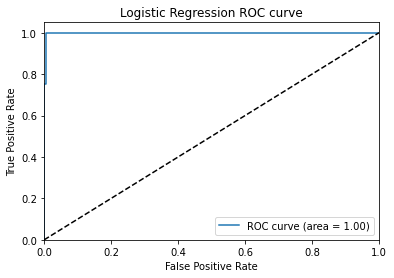

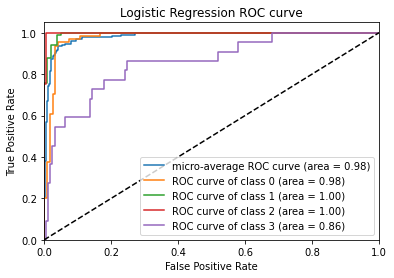

In [30]:
multiple_class_roc(y_test, y_score) # it is a very easy task

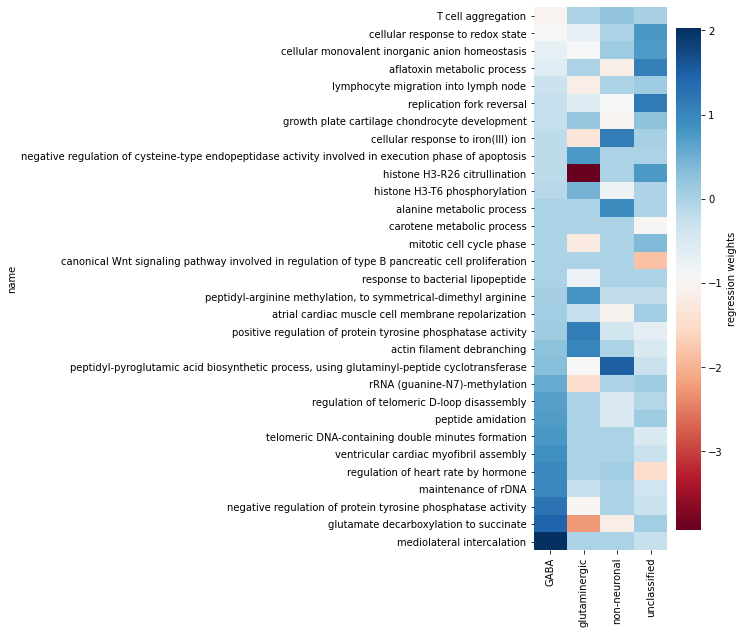

In [31]:
coef = pd.DataFrame(clf.coef_, columns = term_entropy.loc[aggr_RNAseq.columns, 'name'], index = adata.obs['class'].unique())

retained_col = []
for c in coef.columns:
    if (coef[c].abs()> 0.7).any():
        retained_col.append(c)
ig, ax = plt.subplots(figsize=(3,10))   
sns.heatmap(coef[retained_col].transpose().sort_values(by = 'GABA'), cmap = 'RdBu', ax = ax, yticklabels=True, cbar_kws={'label': 'regression weights'})


# Only on MF branch

In [32]:
aggr_RNAseq = pd.read_pickle('tasic_aggr_MF.pickle')
X = aggr_RNAseq.values
y = pd.get_dummies(adata.obs['class']).values
d = DataLoader(X, y)
X_train, y_train, X_test, y_test = d.split()
clf = LogisticRegression(random_state=0, penalty = 'l1', solver = 'liblinear').fit(X_train, to_class(y_train)) # lasso
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

clf.score(X_test, to_class(y_test)) # accuracy

0.8913043478260869

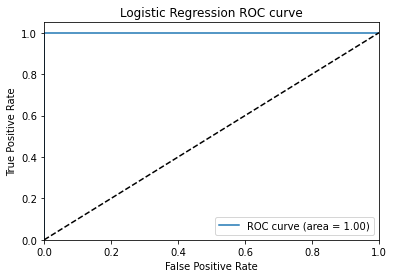

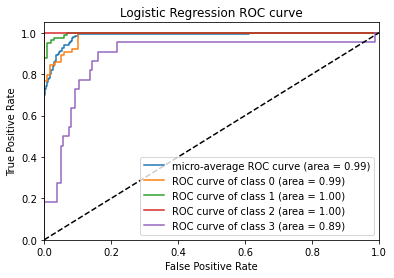

In [33]:
multiple_class_roc(y_test, y_score) # it is a very easy task

In [34]:
aggr_RNAseq.head()

,GO:0003674,GO:0043169,GO:0003887,GO:0050080,GO:0005018,GO:0043168,GO:0036137,GO:0002196,GO:0042937,GO:0008126,...,GO:0071916,GO:0015636,GO:0015207,GO:0005362,GO:0047751,GO:0004775,GO:0004776,GO:0004797,GO:0061953,GO:0003980
index,,,,,,,,,,,,,,,,,,,,,
Calb2_tdTpositive_cell_1,2920.425537,667.751343,2.731863,0.001477,0.000000,597.781250,1.658312,0.001484,0.000000,0.000000,...,0.007723,0.0,6.058735,0.000000,0.305897,3.868169,1.907106,0.00000,0.000000,1.723683
Calb2_tdTpositive_cell_2,2707.609375,625.596680,1.538884,0.000000,0.000000,554.181763,2.067528,1.645978,0.000000,0.006432,...,0.010410,0.0,3.984077,0.000000,0.000000,0.006423,0.000000,0.00000,0.460045,0.095000
Calb2_tdTpositive_cell_3,2969.220215,708.125061,2.245917,0.000000,0.000000,587.980347,0.000000,0.727122,0.000000,1.317193,...,0.011593,0.0,5.129033,0.000000,0.003335,1.983129,1.207149,0.00000,0.002769,0.006826
Calb2_tdTpositive_cell_4,3072.520508,733.072754,3.267318,0.000000,0.189799,620.067871,2.077794,0.660511,0.000000,0.000000,...,0.009461,0.0,5.226249,0.001979,0.740157,2.950072,1.480865,0.00000,0.000000,0.002497
Calb2_tdTpositive_cell_5,2911.715332,673.887451,3.133240,0.000775,0.000000,589.903076,0.004644,0.520833,0.027544,0.000000,...,0.016854,0.0,5.930509,0.000000,0.002922,1.280775,1.276904,0.07938,0.000357,0.325173


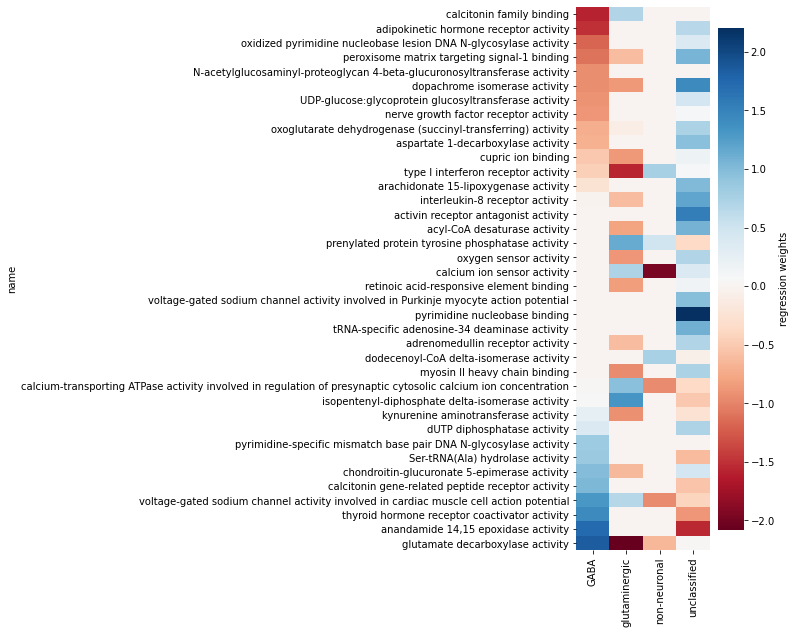

In [35]:
import seaborn as sns
coef = pd.DataFrame(clf.coef_, columns = term_entropy.loc[aggr_RNAseq.columns, 'name'], index = adata.obs['class'].unique())

retained_col = []
for c in coef.columns:
    if (coef[c].abs()> 0.7).any():
        retained_col.append(c)
ig, ax = plt.subplots(figsize=(3,10))   
sns.heatmap(coef[retained_col].transpose().sort_values(by = 'GABA'), cmap = 'RdBu', ax = ax, yticklabels=True, cbar_kws={'label': 'regression weights'})
